In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/double \a

/content/drive/MyDrive/double a


In [3]:
!pip install --upgrade lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=126741c5f07a5e0d0b2631be2aed416279af5565098c8d86968308fbd8307c11
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts
from lifelines import CoxPHFitter

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_excel("TMP.xlsx")
len(df)

254

In [6]:
df['存活狀態     1.存2.歿'] = df['存活狀態     1.存2.歿'].apply(lambda x: x-1)
df.rename(columns={'#VALUE!': 'diff_days'}, inplace=True)

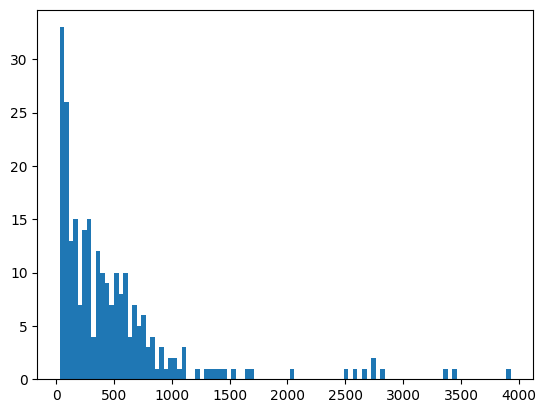

In [7]:
plt.hist(df['活著'], bins = 100)
plt.show()

In [8]:
kmf_EV = KaplanMeierFitter(label='EV')
kmf_EV.fit(df.loc[df['EV or GV Y1N2'] == 1, '活著'],
           event_observed = df.loc[df['EV or GV Y1N2'] == 1, '存活狀態     1.存2.歿'])

<lifelines.KaplanMeierFitter:"EV", fitted with 42 total observations, 2 right-censored observations>

In [9]:
kmf_nEV = KaplanMeierFitter(label='nEV')
kmf_nEV.fit(df.loc[df['EV or GV Y1N2'] == 2, '活著'],
           event_observed = df.loc[df['EV or GV Y1N2'] == 2, '存活狀態     1.存2.歿'])

<lifelines.KaplanMeierFitter:"nEV", fitted with 212 total observations, 52 right-censored observations>

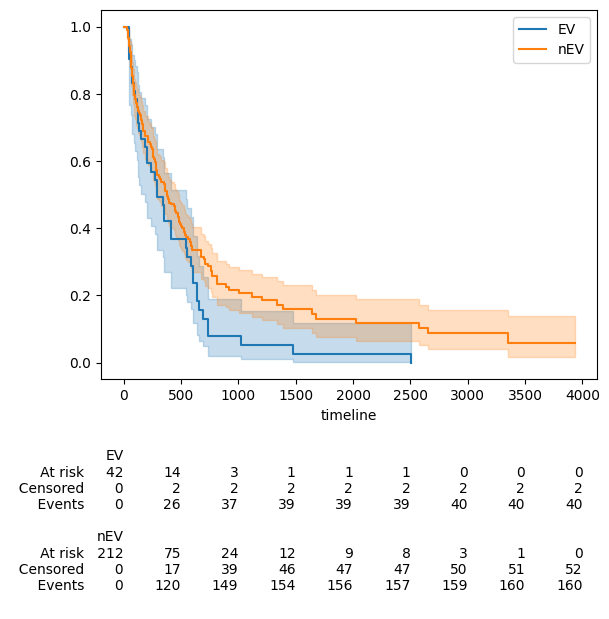

In [10]:
kmf_EV.survival_function_
kmf_nEV.survival_function_

ax = kmf_EV.plot_survival_function(label='EV')
kmf_nEV.plot_survival_function(label='nEV')

add_at_risk_counts(kmf_EV, kmf_nEV)
plt.show()

In [11]:
dem = (df['EV or GV Y1N2'] == 1)

results = logrank_test(df['活著'][dem],
                       df['活著'][~dem],
                       df['存活狀態     1.存2.歿'][dem],
                       df['存活狀態     1.存2.歿'][~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.43 0.04      4.82

In [12]:
results.p_value

0.035372760916590626

<Axes: xlabel='timeline'>

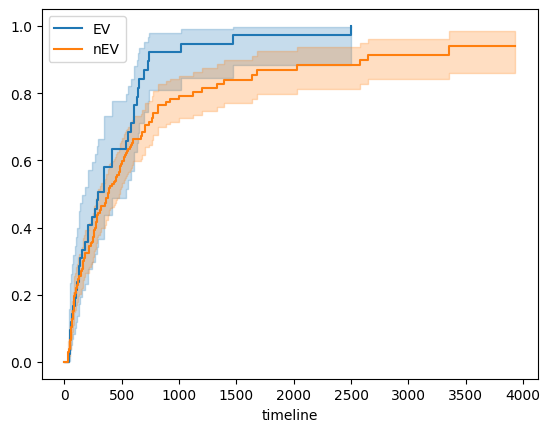

In [13]:
kmf_EV.cumulative_density_
kmf_nEV.cumulative_density_

kmf_EV.plot_cumulative_density(label='EV')
kmf_nEV.plot_cumulative_density(label='nEV')

In [14]:
kmf_EV.survival_function_at_times([1*12*30, 2*12*30, 3*12*30, 5*12*30], label=None)

360     0.420330
720     0.131353
1080    0.052541
1800    0.026271
Name: EV, dtype: float64

In [15]:
kmf_nEV.survival_function_at_times([1*12*30, 2*12*30, 3*12*30, 5*12*30], label=None)

360     0.527131
720     0.294222
1080    0.208285
1800    0.131283
Name: nEV, dtype: float64

In [16]:
from lifelines.utils import median_survival_times
median_EV = kmf_EV.median_survival_time_
median_confidence_interval_EV = median_survival_times(kmf_EV.confidence_interval_)
print(median_EV)
print(median_confidence_interval_EV)

292.0
     EV_lower_0.95  EV_upper_0.95
0.5          182.0          542.0


In [17]:
median_nEV = kmf_nEV.median_survival_time_
median_confidence_interval_nEV = median_survival_times(kmf_nEV.confidence_interval_)
print(median_nEV)
print(median_confidence_interval_nEV)

379.0
     nEV_lower_0.95  nEV_upper_0.95
0.5           289.0           484.0


Text(0.5, 1.0, 'Survival of different gender group')

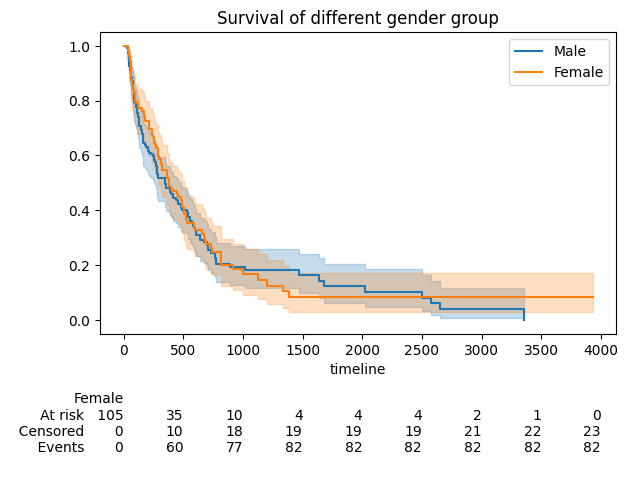

In [18]:
ax = plt.subplot(111)
male = (df['性別'] == 1)
kmf = KaplanMeierFitter()
kmf.fit(durations=df['活著'][male], event_observed=df['存活狀態     1.存2.歿'][male], label='Male')
kmf.plot_survival_function(ax=ax)
kmf.fit(durations=df['活著'][~male], event_observed=df['存活狀態     1.存2.歿'][~male], label='Female')
kmf.plot_survival_function(ax=ax, at_risk_counts=True)
plt.title("Survival of different gender group")


In [19]:
dem = (df['性別'] == 1)

results = logrank_test(df['活著'][dem],
                       df['活著'][~dem],
                       df['存活狀態     1.存2.歿'][dem],
                       df['存活狀態     1.存2.歿'][~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.25 0.62      0.69

Text(0.5, 1.0, 'Survival of HBsAg')

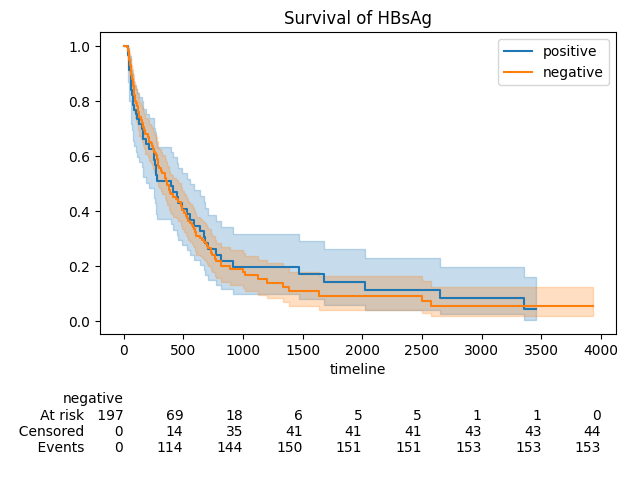

In [20]:
ax = plt.subplot(111)
positive = (df['HBsAg'] == 1)
kmf = KaplanMeierFitter()
kmf.fit(durations=df['活著'][positive], event_observed=df['存活狀態     1.存2.歿'][positive], label='positive')
kmf.plot_survival_function(ax=ax)
kmf.fit(durations=df['活著'][~positive], event_observed=df['存活狀態     1.存2.歿'][~positive], label='negative')
kmf.plot_survival_function(ax=ax, at_risk_counts=True)
plt.title("Survival of HBsAg")

In [21]:
dem = (df['HBsAg'] == 1)

results = logrank_test(df['活著'][dem],
                       df['活著'][~dem],
                       df['存活狀態     1.存2.歿'][dem],
                       df['存活狀態     1.存2.歿'][~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.07 0.79      0.35

Text(0.5, 1.0, 'Survival of HCV')

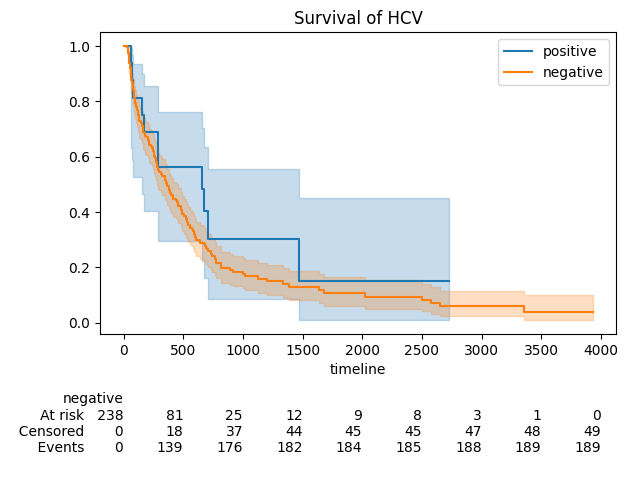

In [22]:
ax = plt.subplot(111)
positive = (df['HCV'] == 1)
kmf = KaplanMeierFitter()
kmf.fit(durations=df['活著'][positive], event_observed=df['存活狀態     1.存2.歿'][positive], label='positive')
kmf.plot_survival_function(ax=ax)
kmf.fit(durations=df['活著'][~positive], event_observed=df['存活狀態     1.存2.歿'][~positive], label='negative')
kmf.plot_survival_function(ax=ax, at_risk_counts=True)
plt.title("Survival of HCV")

In [23]:
dem = (df['HCV'] == 1)

results = logrank_test(df['活著'][dem],
                       df['活著'][~dem],
                       df['存活狀態     1.存2.歿'][dem],
                       df['存活狀態     1.存2.歿'][~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.40 0.24      2.08

In [24]:
df['診斷年齡'] = pd.to_numeric(df['診斷年齡'], errors='coerce')

# 計算最大值、最小值和中位數
max_age = df['診斷年齡'].max()
min_age = df['診斷年齡'].min()
median_age = df['診斷年齡'].median()

# 輸出結果
print(f"診斷年齡最大值: {max_age}, 診斷年齡最小值: {min_age}, 診斷年齡中位數: {median_age}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['診斷年齡'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['診斷年齡'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的年齡: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的年齡: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

診斷年齡最大值: 92.4, 診斷年齡最小值: 35.8, 診斷年齡中位數: 66.75
有 EV 組別的年齡: 最大值=84.1, 最小值=39.6, 中位數=65.5
無 EV 組別的年齡: 最大值=92.4, 最小值=35.8, 中位數=67.15
t 檢驗的 p 值: 0.29898747892376315


In [25]:
total_count = len(df)

# 計算男性（性別=1）的人數和百分比
male_count = len(df[df['性別'] == 1])
male_percentage = (male_count / total_count) * 100

# 計算有 EV 的男性（性別=1）的人數和百分比
ev_male_count = len(df[(df['性別'] == 1) & (df['EV or GV Y1N2'] == 1)])
ev_male_percentage = (ev_male_count / male_count) * 100 if male_count > 0 else 0

# 計算沒有 EV 的男性（性別=1）的人數和百分比
no_ev_male_count = len(df[(df['性別'] == 1) & (df['EV or GV Y1N2'] == 2)])
no_ev_male_percentage = (no_ev_male_count / male_count) * 100 if male_count > 0 else 0

ev_male_ages = df[(df['性別'] == 1) & (df['EV or GV Y1N2'] == 1)]['診斷年齡'].dropna()
no_ev_male_ages = df[(df['性別'] == 1) & (df['EV or GV Y1N2'] == 2)]['診斷年齡'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_male_ages, no_ev_male_ages, equal_var=False)

print(f"總人數: {total_count}")
print(f"男性人數: {male_count} ({male_percentage:.2f}%)")
print(f"有 EV 的男性人數: {ev_male_count} ({ev_male_percentage:.2f}%)")
print(f"沒有 EV 的男性人數: {no_ev_male_count} ({no_ev_male_percentage:.2f}%)")
print(f"有 EV 和沒有 EV 的男性之間年齡的 t 檢驗 p 值: {p_value:.5f}")

總人數: 254
男性人數: 149 (58.66%)
有 EV 的男性人數: 33 (22.15%)
沒有 EV 的男性人數: 116 (77.85%)
有 EV 和沒有 EV 的男性之間年齡的 t 檢驗 p 值: 0.59616


In [26]:
df['HBsAg'] = pd.to_numeric(df['HBsAg'], errors='coerce')

# 計算 HBsAg positive（HBsAg=1）的人數和百分比
total_count = len(df)
hbsag_positive_count = len(df[df['HBsAg'] == 1])
hbsag_positive_percentage = (hbsag_positive_count / total_count) * 100

# 計算有 EV 的 HBsAg positive（HBsAg=1）的人數和百分比
ev_hbsag_positive_count = len(df[(df['HBsAg'] == 1) & (df['EV or GV Y1N2'] == 1)])
ev_hbsag_positive_percentage = (ev_hbsag_positive_count / hbsag_positive_count) * 100 if hbsag_positive_count > 0 else 0

# 計算沒有 EV 的 HBsAg positive（HBsAg=1）的人數和百分比
no_ev_hbsag_positive_count = len(df[(df['HBsAg'] == 1) & (df['EV or GV Y1N2'] == 2)])
no_ev_hbsag_positive_percentage = (no_ev_hbsag_positive_count / hbsag_positive_count) * 100 if hbsag_positive_count > 0 else 0

ev_hbsag_positive_ages = df[(df['HBsAg'] == 1) & (df['EV or GV Y1N2'] == 1)]['診斷年齡'].dropna()
no_ev_hbsag_positive_ages = df[(df['HBsAg'] == 1) & (df['EV or GV Y1N2'] == 2)]['診斷年齡'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_hbsag_positive_ages, no_ev_hbsag_positive_ages, equal_var=False)

# 輸出結果
print(f"HBsAg positive 的人數: {hbsag_positive_count} ({hbsag_positive_percentage:.2f}%)")
print(f"有 EV 的 HBsAg positive 的人數: {ev_hbsag_positive_count} ({ev_hbsag_positive_percentage:.2f}%)")
print(f"沒有 EV 的 HBsAg positive 的人數: {no_ev_hbsag_positive_count} ({no_ev_hbsag_positive_percentage:.2f}%)")
print(f"有 EV 和沒有 EV 的 HBsAg positive 之間年齡的 t 檢驗 p 值: {p_value:.5f}")

HBsAg positive 的人數: 57 (22.44%)
有 EV 的 HBsAg positive 的人數: 9 (15.79%)
沒有 EV 的 HBsAg positive 的人數: 48 (84.21%)
有 EV 和沒有 EV 的 HBsAg positive 之間年齡的 t 檢驗 p 值: 0.75735


In [27]:
df['HCV'] = pd.to_numeric(df['HCV'], errors='coerce')

# 計算 HBsAg positive（HBsAg=1）的人數和百分比
total_count = len(df)
hbsag_positive_count = len(df[df['HCV'] == 1])
hbsag_positive_percentage = (hbsag_positive_count / total_count) * 100

# 計算有 EV
ev_hbsag_positive_count = len(df[(df['HCV'] == 1) & (df['EV or GV Y1N2'] == 1)])
ev_hbsag_positive_percentage = (ev_hbsag_positive_count / hbsag_positive_count) * 100 if hbsag_positive_count > 0 else 0

# 計算沒有 EV
no_ev_hbsag_positive_count = len(df[(df['HCV'] == 1) & (df['EV or GV Y1N2'] == 2)])
no_ev_hbsag_positive_percentage = (no_ev_hbsag_positive_count / hbsag_positive_count) * 100 if hbsag_positive_count > 0 else 0

ev_hbsag_positive_ages = df[(df['HCV'] == 1) & (df['EV or GV Y1N2'] == 1)]['診斷年齡'].dropna()
no_ev_hbsag_positive_ages = df[(df['HCV'] == 1) & (df['EV or GV Y1N2'] == 2)]['診斷年齡'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_hbsag_positive_ages, no_ev_hbsag_positive_ages, equal_var=False)

# 輸出結果
print(f"HCV positive 的人數: {hbsag_positive_count} ({hbsag_positive_percentage:.2f}%)")
print(f"有 EV 的 HCV positive 的人數: {ev_hbsag_positive_count} ({ev_hbsag_positive_percentage:.2f}%)")
print(f"沒有 EV 的 HCV positive 的人數: {no_ev_hbsag_positive_count} ({no_ev_hbsag_positive_percentage:.2f}%)")
print(f"有 EV 和沒有 EV 的 HCV positive 之間年齡的 t 檢驗 p 值: {p_value:.5f}")

HCV positive 的人數: 16 (6.30%)
有 EV 的 HCV positive 的人數: 6 (37.50%)
沒有 EV 的 HCV positive 的人數: 10 (62.50%)
有 EV 和沒有 EV 的 HCV positive 之間年齡的 t 檢驗 p 值: 0.04440


In [28]:
df['ALB'] = pd.to_numeric(df['ALB'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['ALB'].max()
min_value = df['ALB'].min()
median_value = df['ALB'].median()

# 輸出結果
print(f"ALB最大值: {max_value}, ALB最小值: {min_value}, ALB中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['ALB'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['ALB'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

ALB最大值: 5.9, ALB最小值: 1.33, ALB中位數: 3.7
有 EV 組別的: 最大值=4.6, 最小值=2.4, 中位數=3.5
無 EV 組別的: 最大值=5.9, 最小值=1.33, 中位數=3.8
t 檢驗的 p 值: 0.12174402015079372


In [29]:
df['Na'] = pd.to_numeric(df['Na'], errors='coerce')

max_value = df['Na'].max()
min_value = df['Na'].min()
median_value = df['Na'].median()

print(f"Na最大值: {max_value}, Na最小值: {min_value}, Na中位數: {median_value}")

# EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Na'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Na'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

Na最大值: 147.0, Na最小值: 0.51, Na中位數: 138.0
有 EV 組別的: 最大值=145.0, 最小值=130.0, 中位數=138.0
無 EV 組別的: 最大值=147.0, 最小值=0.51, 中位數=139.0
t 檢驗的 p 值: 0.7779833482463674


In [30]:
df['K'] = pd.to_numeric(df['K'], errors='coerce')

max_value = df['K'].max()
min_value = df['K'].min()
median_value = df['K'].median()

print(f"K最大值: {max_value}, K最小值: {min_value}, K中位數: {median_value}")

# EV 和 no EV
ev_group = df[df['EV or GV Y1N2'] == 1]['K'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['K'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

K最大值: 6.9, K最小值: 0.21, K中位數: 4.095
有 EV 組別的: 最大值=5.76, 最小值=3.5, 中位數=4.1
無 EV 組別的: 最大值=6.9, 最小值=0.21, 中位數=4.085
t 檢驗的 p 值: 0.24722075124995802


In [31]:
df['Cr'] = pd.to_numeric(df['Cr'], errors='coerce')

max_value = df['Cr'].max()
min_value = df['Cr'].min()
median_value = df['Cr'].median()

print(f"Cr最大值: {max_value}, Cr最小值: {min_value}, Cr中位數: {median_value}")

# EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Cr'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Cr'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

Cr最大值: 11.01, Cr最小值: 0.33, Cr中位數: 0.85
有 EV 組別的: 最大值=1.65, 最小值=0.56, 中位數=0.835
無 EV 組別的: 最大值=11.01, 最小值=0.33, 中位數=0.85
t 檢驗的 p 值: 0.2796506494483922


In [32]:
df['BILI'] = pd.to_numeric(df['BILI'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['BILI'].max()
min_value = df['BILI'].min()
median_value = df['BILI'].median()

# 輸出結果
print(f"BILI最大值: {max_value}, BILI最小值: {min_value}, BILI中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['BILI'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['BILI'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

BILI最大值: 37.57, BILI最小值: 0.17, BILI中位數: 0.82
有 EV 組別的: 最大值=37.57, 最小值=0.34, 中位數=1.09
無 EV 組別的: 最大值=20.9, 最小值=0.17, 中位數=0.755
t 檢驗的 p 值: 0.1179702047771962


In [33]:
df['ALK-P'] = pd.to_numeric(df['ALK-P'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['ALK-P'].max()
min_value = df['ALK-P'].min()
median_value = df['ALK-P'].median()

# 輸出結果
print(f"ALK-P最大值: {max_value}, ALK-P最小值: {min_value}, ALK-P中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['ALK-P'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['ALK-P'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

ALK-P最大值: 1360.0, ALK-P最小值: 42.0, ALK-P中位數: 156.0
有 EV 組別的: 最大值=1078.0, 最小值=50.0, 中位數=159.0
無 EV 組別的: 最大值=1360.0, 最小值=42.0, 中位數=151.5
t 檢驗的 p 值: 0.6696283256165219


In [34]:
df['GGT'] = pd.to_numeric(df['GGT'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['GGT'].max()
min_value = df['GGT'].min()
median_value = df['GGT'].median()

# 輸出結果
print(f"GGT最大值: {max_value}, GGT最小值: {min_value}, GGT中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['GGT'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['GGT'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

GGT最大值: 2917.0, GGT最小值: 11.0, GGT中位數: 159.0
有 EV 組別的: 最大值=2917.0, 最小值=19.0, 中位數=174.0
無 EV 組別的: 最大值=1546.0, 最小值=11.0, 中位數=159.0
t 檢驗的 p 值: 0.12375354427012254


In [35]:
df['ALT'] = pd.to_numeric(df['ALT'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['ALT'].max()
min_value = df['ALT'].min()
median_value = df['ALT'].median()

# 輸出結果
print(f"ALT最大值: {max_value}, ALT最小值: {min_value}, ALT中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['ALT'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['ALT'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

ALT最大值: 1937.0, ALT最小值: 6.0, ALT中位數: 35.0
有 EV 組別的: 最大值=607.0, 最小值=10.0, 中位數=40.5
無 EV 組別的: 最大值=1937.0, 最小值=6.0, 中位數=34.5
t 檢驗的 p 值: 0.4187146457597183


In [36]:
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['AST'].max()
min_value = df['AST'].min()
median_value = df['AST'].median()

# 輸出結果
print(f"AST最大值: {max_value}, AST最小值: {min_value}, AST中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['AST'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['AST'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

AST最大值: 1103.0, AST最小值: 12.0, AST中位數: 42.0
有 EV 組別的: 最大值=1103.0, 最小值=14.0, 中位數=57.5
無 EV 組別的: 最大值=830.0, 最小值=12.0, 中位數=40.5
t 檢驗的 p 值: 0.04979830487797146


In [37]:
df['WBC'] = pd.to_numeric(df['WBC'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['WBC'].max()
min_value = df['WBC'].min()
median_value = df['WBC'].median()

# 輸出結果
print(f"WBC最大值: {max_value}, WBC最小值: {min_value}, WBC中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['WBC'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['WBC'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

WBC最大值: 114000.0, WBC最小值: 990.0, WBC中位數: 7800.0
有 EV 組別的: 最大值=21000.0, 最小值=3320.0, 中位數=6740.0
無 EV 組別的: 最大值=114000.0, 最小值=990.0, 中位數=8100.0
t 檢驗的 p 值: 0.5301278033764576


In [38]:
df['HB'] = pd.to_numeric(df['HB'], errors='coerce')

# 計算最大值、最小值和中位數
max_value = df['HB'].max()
min_value = df['HB'].min()
median_value = df['HB'].median()

# 輸出結果
print(f"HB最大值: {max_value}, HB最小值: {min_value}, HB中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['HB'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['HB'].dropna()

# 計算 t 檢驗的 p 值
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

# 輸出結果
print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

HB最大值: 18.4, HB最小值: 7.0, HB中位數: 12.4
有 EV 組別的: 最大值=16.9, 最小值=8.5, 中位數=12.649999999999999
無 EV 組別的: 最大值=18.4, 最小值=7.0, 中位數=12.4
t 檢驗的 p 值: 0.9851984733971948


In [39]:
df['PLAT'] = pd.to_numeric(df['PLAT'], errors='coerce')

max_value = df['PLAT'].max()
min_value = df['PLAT'].min()
median_value = df['PLAT'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['PLAT'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['PLAT'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 1680000.0, 最小值: 13000.0, 中位數: 213000.0
有 EV 組別的: 最大值=537000.0, 最小值=75000.0, 中位數=170000.0
無 EV 組別的: 最大值=1680000.0, 最小值=13000.0, 中位數=228000.0
t 檢驗的 p 值: 0.027563364365824454


In [40]:
df['PT    sec'] = pd.to_numeric(df['PT    sec'], errors='coerce')

max_value = df['PT    sec'].max()
min_value = df['PT    sec'].min()
median_value = df['PT    sec'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['PT    sec'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['PT    sec'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 32.5, 最小值: 1.04, 中位數: 11.7
有 EV 組別的: 最大值=17.0, 最小值=10.4, 中位數=11.850000000000001
無 EV 組別的: 最大值=32.5, 最小值=1.04, 中位數=11.6
t 檢驗的 p 值: 0.07920461347563303


In [41]:
df['INR'] = pd.to_numeric(df['INR'], errors='coerce')

max_value = df['INR'].max()
min_value = df['INR'].min()
median_value = df['INR'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['INR'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['INR'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 10.9, 最小值: 0.83, 中位數: 1.09
有 EV 組別的: 最大值=1.57, 最小值=1.0, 中位數=1.105
無 EV 組別的: 最大值=10.9, 最小值=0.83, 中位數=1.09
t 檢驗的 p 值: 0.7638519483857374


In [42]:
df['Band'] = pd.to_numeric(df['Band'], errors='coerce')

max_value = df['Band'].max()
min_value = df['Band'].min()
median_value = df['Band'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Band'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Band'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 1.9, 最小值: 0.0, 中位數: 0.0
有 EV 組別的: 最大值=0.0, 最小值=0.0, 中位數=0.0
無 EV 組別的: 最大值=1.9, 最小值=0.0, 中位數=0.0
t 檢驗的 p 值: 0.39550559748827774


In [43]:
df['Seg'] = pd.to_numeric(df['Seg'], errors='coerce')

max_value = df['Seg'].max()
min_value = df['Seg'].min()
median_value = df['Seg'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Seg'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Seg'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 97.0, 最小值: 39.0, 中位數: 71.0
有 EV 組別的: 最大值=89.9, 最小值=52.1, 中位數=70.19999999999999
無 EV 組別的: 最大值=97.0, 最小值=39.0, 中位數=71.1
t 檢驗的 p 值: 0.844684910432352


In [44]:
df['Lymphocytes'] = pd.to_numeric(df['Lymphocytes'], errors='coerce')

max_value = df['Lymphocytes'].max()
min_value = df['Lymphocytes'].min()
median_value = df['Lymphocytes'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Lymphocytes'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Lymphocytes'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")


最大值: 48.7, 最小值: 1.0, 中位數: 18.1
有 EV 組別的: 最大值=35.6, 最小值=4.7, 中位數=16.700000000000003
無 EV 組別的: 最大值=48.7, 最小值=1.0, 中位數=18.2
t 檢驗的 p 值: 0.5757578836750636


In [45]:
df['Monocytes'] = pd.to_numeric(df['Monocytes'], errors='coerce')

max_value = df['Monocytes'].max()
min_value = df['Monocytes'].min()
median_value = df['Monocytes'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Monocytes'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Monocytes'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 103.0, 最小值: 0.9, 中位數: 7.6
有 EV 組別的: 最大值=103.0, 最小值=0.9, 中位數=9.3
無 EV 組別的: 最大值=16.4, 最小值=0.9, 中位數=7.5
t 檢驗的 p 值: 0.01130252252011348


In [46]:
df['Eosinophils'] = pd.to_numeric(df['Eosinophils'], errors='coerce')

max_value = df['Eosinophils'].max()
min_value = df['Eosinophils'].min()
median_value = df['Eosinophils'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['Eosinophils'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['Eosinophils'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 13.3, 最小值: 0.0, 中位數: 1.5
有 EV 組別的: 最大值=12.9, 最小值=0.0, 中位數=1.8
無 EV 組別的: 最大值=13.3, 最小值=0.0, 中位數=1.5
t 檢驗的 p 值: 0.24011005459266796


In [47]:
df['AFP'] = pd.to_numeric(df['AFP'], errors='coerce')

max_value = df['AFP'].max()
min_value = df['AFP'].min()
median_value = df['AFP'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['AFP'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['AFP'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 3201.08, 最小值: 0.91, 中位數: 3.385
有 EV 組別的: 最大值=672.0, 最小值=0.91, 中位數=5.96
無 EV 組別的: 最大值=3201.08, 最小值=0.91, 中位數=3.21
t 檢驗的 p 值: 0.985366457810412


In [48]:
df['CA199'] = pd.to_numeric(df['CA199'], errors='coerce')

max_value = df['CA199'].max()
min_value = df['CA199'].min()
median_value = df['CA199'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['CA199'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['CA199'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 1417200.0, 最小值: 0.08, 中位數: 93.945
有 EV 組別的: 最大值=47587.0, 最小值=1.0, 中位數=51.7
無 EV 組別的: 最大值=1417200.0, 最小值=0.08, 中位數=110.0
t 檢驗的 p 值: 0.630975664683591


In [49]:
df['surgery Y1N2'] = pd.to_numeric(df['surgery Y1N2'], errors='coerce')

max_value = df['surgery Y1N2'].max()
min_value = df['surgery Y1N2'].min()
median_value = df['surgery Y1N2'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['surgery Y1N2'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['surgery Y1N2'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 2.0, 最小值: 1.0, 中位數: 2.0
有 EV 組別的: 最大值=2.0, 最小值=1.0, 中位數=2.0
無 EV 組別的: 最大值=2.0, 最小值=1.0, 中位數=2.0
t 檢驗的 p 值: 0.07235664098375619


In [50]:
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

max_value = df['BMI'].max()
min_value = df['BMI'].min()
median_value = df['BMI'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['BMI'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['BMI'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 44.837, 最小值: 13.655, 中位數: 23.742
有 EV 組別的: 最大值=30.005, 最小值=17.63, 中位數=23.945999999999998
無 EV 組別的: 最大值=44.837, 最小值=13.655, 中位數=23.742
t 檢驗的 p 值: 0.6983254189864021


In [53]:
df['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'] = pd.to_numeric(df['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'], errors='coerce')

max_value = df['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'].max()
min_value = df['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'].min()
median_value = df['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

KeyError: '影像上的血管侵犯(Portal vein,Hepatic vein) 1.有  2.無)'

In [ ]:
df['肝外轉移     1.有  2.無'] = pd.to_numeric(df['肝外轉移     1.有  2.無'], errors='coerce')

max_value = df['肝外轉移     1.有  2.無'].max()
min_value = df['肝外轉移     1.有  2.無'].min()
median_value = df['肝外轉移     1.有  2.無'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['肝外轉移     1.有  2.無'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['肝外轉移     1.有  2.無'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

In [55]:
df['影像上的腫瘤數'] = pd.to_numeric(df['影像上的腫瘤數'], errors='coerce')

max_value = df['影像上的腫瘤數'].max()
min_value = df['影像上的腫瘤數'].min()
median_value = df['影像上的腫瘤數'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['影像上的腫瘤數'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['影像上的腫瘤數'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

KeyError: '影像上的腫瘤數'

In [54]:
df['腫瘤大小'] = pd.to_numeric(df['腫瘤大小'], errors='coerce')

max_value = df['腫瘤大小'].max()
min_value = df['腫瘤大小'].min()
median_value = df['腫瘤大小'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['腫瘤大小'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['腫瘤大小'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 18.3, 最小值: 0.4, 中位數: 5.5
有 EV 組別的: 最大值=18.3, 最小值=0.4, 中位數=5.0
無 EV 組別的: 最大值=14.8, 最小值=1.0, 中位數=5.5
t 檢驗的 p 值: 0.6262654190167721


In [56]:
df['ascites  no 1     mild 2       moderate           to severe 3)'] = pd.to_numeric(df['ascites  no 1     mild 2       moderate           to severe 3)'], errors='coerce')

max_value = df['ascites  no 1     mild 2       moderate           to severe 3)'].max()
min_value = df['ascites  no 1     mild 2       moderate           to severe 3)'].min()
median_value = df['ascites  no 1     mild 2       moderate           to severe 3)'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['ascites  no 1     mild 2       moderate           to severe 3)'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['ascites  no 1     mild 2       moderate           to severe 3)'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 4.0, 最小值: 0.0, 中位數: 1.0
有 EV 組別的: 最大值=4.0, 最小值=0.0, 中位數=1.0
無 EV 組別的: 最大值=4.0, 最小值=0.0, 中位數=1.0
t 檢驗的 p 值: 0.7912715154269029


In [57]:
import pandas as pd
import numpy as np

# 假設已經從 Excel 文件中讀取數據
df = pd.read_excel("TMP.xlsx")

# 確保所有必要數據列為數字型態，使用 pd.to_numeric 函數
df['診斷年齡'] = pd.to_numeric(df['診斷年齡'], errors='coerce')
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')
df['ALT'] = pd.to_numeric(df['ALT'], errors='coerce')
df['PLAT'] = pd.to_numeric(df['PLAT'], errors='coerce')

# 將血小板計數除以1000
df['PLAT'] = df['PLAT'] / 1000

# 計算 FIB-4 指數
df['FIB-4'] = (df['診斷年齡'] * df['AST']) / (df['PLAT'] * np.sqrt(df['ALT']))

# 將結果寫回到 Excel 文件
df.to_excel("TMP_with_FIB4.xlsx", index=False)

# 輸出結果
print(df[['診斷年齡', 'AST', 'ALT', 'PLAT', 'FIB-4']])

     診斷年齡     AST   ALT   PLAT       FIB-4
0    61.1    22.0  22.0  168.0    1.705860
1    66.8    21.0  33.0  150.0    1.627974
2    46.9    53.0  21.0  111.0    4.886705
3    51.1    60.0  34.0  150.0    3.505431
4    72.2    27.0   8.0  190.0    3.627458
..    ...     ...   ...    ...         ...
249  67.9    36.0  15.0  305.0    2.069316
250  67.2    23.0  21.0  281.0    1.200276
251  55.8  1103.0  48.0   75.0  118.448027
252  42.8    31.0  24.0  252.0    1.074730
253  78.8    34.0  26.0  293.0    1.793291

[254 rows x 5 columns]


In [58]:
df['FIB-4'] = pd.to_numeric(df['FIB-4'], errors='coerce')

max_value = df['FIB-4'].max()
min_value = df['FIB-4'].min()
median_value = df['FIB-4'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['FIB-4'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['FIB-4'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: 118.44802652640523, 最小值: 0.11473214285714285, 中位數: 2.304753289304755
有 EV 組別的: 最大值=118.44802652640523, 最小值=0.6135908336543713, 中位數=2.8612783539183835
無 EV 組別的: 最大值=30.57064782290687, 最小值=0.11473214285714285, 中位數=2.0983886120128203
t 檢驗的 p 值: 0.005683767235755827


In [59]:
df['BILI'] = df['BILI'] / 17.1
df['albi'] = (np.log10(df['BILI']) * 0.66) + (df['ALB'] * -0.085)

# 將結果寫回到 Excel 文件
df.to_excel("TMP_with_ALBI_Score.xlsx", index=False)

print(df[['BILI', 'ALB', 'BILI', 'albi']])

         BILI  ALB      BILI      albi
0    0.069591  4.0  0.069591 -1.103916
1    0.042690  3.8  0.042690 -1.226984
2    0.054971  3.5  0.054971 -1.129013
3    0.019298  3.8  0.019298 -1.454558
4    0.062573  4.0  0.062573 -1.134384
..        ...  ...       ...       ...
249  0.016959  4.1  0.016959 -1.517095
250  0.029240  3.1  0.029240 -1.275957
251  0.081287  2.8  0.081287 -0.957388
252  0.030409  4.3  0.030409 -1.366715
253  0.026316  3.9  0.026316 -1.374157

[254 rows x 4 columns]


In [60]:
df['albi'] = pd.to_numeric(df['albi'], errors='coerce')

max_value = df['albi'].max()
min_value = df['albi'].min()
median_value = df['albi'].median()
print(f"最大值: {max_value}, 最小值: {min_value}, 中位數: {median_value}")

# 篩選出有 EV 和 no EV 的人
ev_group = df[df['EV or GV Y1N2'] == 1]['albi'].dropna()
no_ev_group = df[df['EV or GV Y1N2'] == 2]['albi'].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ev_group, no_ev_group)

print(f"有 EV 組別的: 最大值={ev_group.max()}, 最小值={ev_group.min()}, 中位數={ev_group.median()}")
print(f"無 EV 組別的: 最大值={no_ev_group.max()}, 最小值={no_ev_group.min()}, 中位數={no_ev_group.median()}")
print(f"t 檢驗的 p 值: {p_value}")

最大值: -0.09738224411698773, 最小值: -1.6531811447491607, 中位數: -1.1825663556723591
有 EV 組別的: 最大值=-0.09738224411698773, 最小值=-1.4631925235876397, 中位數=-1.0611526476453297
無 EV 組別的: 最大值=-0.226954354358922, 最小值=-1.6531811447491607, 中位數=-1.2074188692397103
t 檢驗的 p 值: 0.03620856293349323


In [61]:
tmp = df.copy()
tmp.rename(columns={'性別': 'Gender'}, inplace=True)
tmp.rename(columns={'診斷年齡': 'Age'}, inplace=True)
#
tmp.dropna(subset=['ALB','姓名'], inplace=True)
tmp['ALB'] = tmp['ALB'].apply(lambda x: 1 if int(x) >= 3.5 else 0)
tmp['Age'] = tmp['Age'].apply(lambda x: 1 if int(x) >= 65 else 0)
ALB_dummies = pd.get_dummies(tmp['ALB'], prefix='ALB')
Age_dummies = pd.get_dummies(tmp['Age'], prefix='Age')
tmp = pd.concat([tmp, ALB_dummies], axis=1)
tmp = pd.concat([tmp, Age_dummies], axis=1)

<lifelines.CoxPHFitter: fitted with 216 total observations, 0 right-censored observations>
             duration col = '活著'
                event col = '存活狀態     1.存2.歿'
      baseline estimation = breslow
   number of observations = 216
number of events observed = 216
   partial log-likelihood = -941.54
         time fit was run = 2024-05-28 11:08:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Gender     -0.13       0.88       0.14            -0.40             0.15                 0.67                 1.16
Age         0.33       1.39       0.14             0.05             0.61                 1.05                 1.85
ALB        -0.37       0.69       0.14            -0.65            -0.09                 0.52                 0.91

            cmp to     z    p   -log2(p)
covariate                               
Gender        0.00 -0.90 0.37       1.45
Age           0.00  2.32 0.02       5.61
ALB           0.00 -2.61 0.01       6.78
---
Concordance = 0.59
Partial AIC = 1889.08
log-likelihood ratio test = 14.25 on 3 df
-log2(p) of ll-ratio test = 8.60

<Axes: xlabel='log(HR) (95% CI)'>

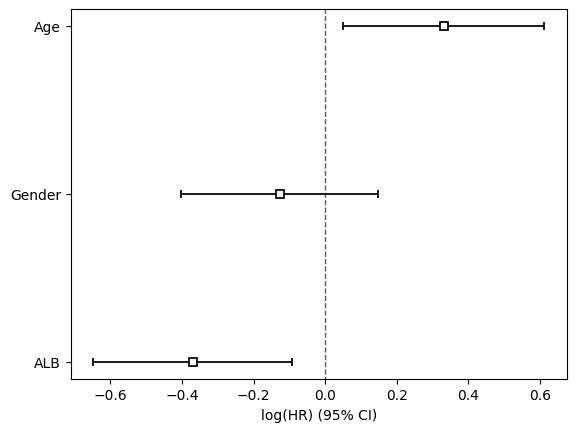

In [62]:
cph = CoxPHFitter()
cph.fit(tmp, duration_col='活著', event_col='存活狀態     1.存2.歿',
        formula="Gender + Age + ALB")
cph.print_summary()
cph.plot()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

model = LogisticRegression()
model.fit(tmp[['ALB', 'Age', 'Gender']], tmp['EV or GV Y1N2'])
tmp['propensity_score'] = model.predict_proba(tmp[['ALB', 'Age', 'Gender']])[:,1]

tmp_treatment = tmp[tmp['EV or GV Y1N2'] == 2]
tmp_control = tmp[tmp['EV or GV Y1N2'] == 1]

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(tmp_control[['propensity_score']])
distances, indices = nbrs.kneighbors(tmp_treatment[['propensity_score']])

matched_control = tmp_control.iloc[indices.flatten()]
matched = matched[matched['EV or GV Y1N2'].notna()]
matched = pd.concat([tmp_treatment.reset_index(drop=True), matched_control.reset_index(drop=True)], axis=0)
matched['EV or GV Y1N2'] = pd.to_numeric(matched['EV or GV Y1N2'])

columns_of_interest = ['Age', 'ALB', 'BILI', 'ALKP', 'CA199', 'ALT', 'AST', 'Cr']
matched.drop(columns=['姓名' ,'1編號', '病歷號', '初診斷日', '死亡日期', '最後追蹤日期',
       '存活狀態     1.存2.歿', 'Combined HCC? Y1N2', '初治療日', 'MELD score', '影像上的腫瘤數', 'EGD date',
       'EV date', 'decompensation date', 'decompensationY1N2', 'prophylaxis date', 'bleeding status', 'secondary'], inplace=True)
print(matched.groupby('EV or GV Y1N2').mean())

cph = CoxPHFitter()
cph.fit(matched, duration_col='活著', event_col='存活狀態     1.存2.歿', formula="Gender + Age + ALB")
cph.print_summary()

NameError: name 'matched' is not defined

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

covariates = ['診斷年齡', '性別', 'ALB', 'BILI', 'CA199', 'ALK-P', 'ALT', 'AST', 'Cr']
treatment = 'EV or GV Y1N2'

#
df['性別'] = df['性別'].astype('category')
df.dropna(subset=covariates, inplace = True)

#
continuous_vars = ['診斷年齡', 'ALB', 'BILI', 'CA199', 'ALK-P', 'ALT', 'AST', 'Cr']
categorical_vars = ['性別']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_vars),
        ('cat', OneHotEncoder(), categorical_vars)
    ])

# 建立邏輯回歸模型
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 定義特徵和標籤
X = df[covariates]
y = df[treatment]

#
model.fit(X, y)

# 計算傾向得分
df['propensity_score'] = model.predict_proba(X)[:, 1]

# 進行傾向得分匹配
nn = NearestNeighbors(n_neighbors=1)
nn.fit(df[['propensity_score']])
distances, indices = nn.kneighbors(df[['propensity_score']])
matched_indices = indices.flatten()

# 創建匹配後的 DataFrame
matched_df = df.iloc[matched_indices]

# 顯示匹配後的基線特徵
# print(matched_df.groupby(treatment).mean())
matched_df.groupby(['EV or GV Y1N2', '性別']).mean()

# 保存匹配後的 DataFrame 到 Excel 文件
output_file_path = "matched_data.xlsx"
matched_df.to_excel(output_file_path, index=False)


TypeError: Could not convert 杜同禎歐陽峰謝永來洪宗暉周碩山周碩山王年興周綏宇施百順林清火梁焜柳陳金鎮鄭進賢戴東杰葉信佑廖偉祥徐松新黃憲輝楊仁德 to numeric